In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv('train.csv')
data.head

<bound method NDFrame.head of             Date     Open     High      Low    Close    Volume
0     2016-01-04  1099.59  1110.75  1093.85  1109.64  66545000
1     2016-01-05  1117.47  1130.57  1112.75  1125.85  41227200
2     2016-01-06  1116.63  1138.68  1116.10  1133.04  42316800
3     2016-01-07  1122.00  1149.76  1117.56  1143.37  64899600
4     2016-01-08  1145.64  1149.96  1120.93  1122.88  52138900
...          ...      ...      ...      ...      ...       ...
1650  2022-07-25  2412.25  2429.44  2387.41  2402.95  29106300
1651  2022-07-26  2289.29  2307.08  2255.66  2280.27  48503400
1652  2022-07-27  2309.14  2404.25  2296.82  2395.54  43790900
1653  2022-07-28  2385.58  2443.26  2377.34  2434.89  25807000
1654  2022-07-29  2410.86  2479.24  2406.35  2474.93  32907600

[1655 rows x 6 columns]>

In [7]:
training_set = data.iloc[:, 1:2].values

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(1655, 1)

In [9]:
X_train = []
y_train = []
for i in range(60, 1655):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

2022-10-22 02:04:12.179744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 02:04:12.179818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [11]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=1))
# model.add(Dropout(0.1))
# model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=15,batch_size=32)

2022-10-22 02:04:20.459338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-22 02:04:20.461615: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-22 02:04:20.461752: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nihal-Lenovo-B50-70): /proc/driver/nvidia/version does not exist
2022-10-22 02:04:20.466940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15
50/50 [==============================] - 49s 510ms/step - loss: 0.0277
Epoch 2/15
50/50 [==============================] - 29s 584ms/step - loss: 0.0017
Epoch 3/15
50/50 [==============================] - 33s 660ms/step - loss: 0.0016
Epoch 4/15
50/50 [==============================] - 29s 573ms/step - loss: 0.0014
Epoch 5/15
50/50 [==============================] - 29s 578ms/step - loss: 0.0015
Epoch 6/15
50/50 [==============================] - 29s 573ms/step - loss: 0.0014
Epoch 7/15
50/50 [==============================] - 29s 569ms/step - loss: 0.0012
Epoch 8/15
50/50 [==============================] - 28s 564ms/step - loss: 0.0014
Epoch 9/15
50/50 [==============================] - 30s 598ms/step - loss: 0.0011
Epoch 10/15
50/50 [==============================] - 29s 585ms/step - loss: 0.0013
Epoch 11/15
50/50 [==============================] - 34s 686ms/step - loss: 0.0011
Epoch 12/15
50/50 [==============================] - 35s 691ms/step - loss: 0.0011
Epoch 13/15
5

In [12]:
dataset_test = pd.read_csv('test.csv')      # ../input/data-analytics-ue20cs312/test.csv is full path
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape

(35, 1)

In [13]:
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
        X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 7s 109ms/step


In [14]:
dataset_test['close'] = predicted_stock_price

In [15]:
dataset_test = dataset_test.drop(['Open'] , axis = 1)
dataset_test = dataset_test.drop(['High'] , axis = 1)
dataset_test = dataset_test.drop(['Low'] , axis = 1)
dataset_test = dataset_test.drop(['Volume'] , axis = 1)

In [16]:
dataset_test = dataset_test.set_index('Date') 

In [23]:
rmse=sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(dataset_test)
print('rmse = ',rmse)

                  close
Date                   
2022-08-01  2415.139648
2022-08-02  2411.627197
2022-08-03  2409.323730
2022-08-04  2409.094482
2022-08-05  2411.373535
2022-08-08  2415.328369
2022-08-09  2420.584229
2022-08-10  2426.669922
2022-08-11  2433.583008
2022-08-12  2441.415771
2022-08-15  2449.995117
2022-08-16  2459.393311
2022-08-17  2470.410645
2022-08-18  2483.081543
2022-08-19  2497.195068
2022-08-22  2512.177979
2022-08-23  2526.638428
2022-08-24  2539.183350
2022-08-25  2548.913086
2022-08-26  2555.547852
2022-08-29  2559.245605
2022-08-30  2559.168213
2022-08-31  2555.401367
2022-09-01  2548.254150
2022-09-02  2537.972168
2022-09-06  2525.592773
2022-09-07  2511.571045
2022-09-08  2496.512695
2022-09-09  2481.552490
2022-09-12  2467.867920
2022-09-13  2456.671875
2022-09-14  2448.343506
2022-09-15  2442.422852
2022-09-16  2438.275635
2022-09-19  2434.668457
rmse =  74.99573338477511


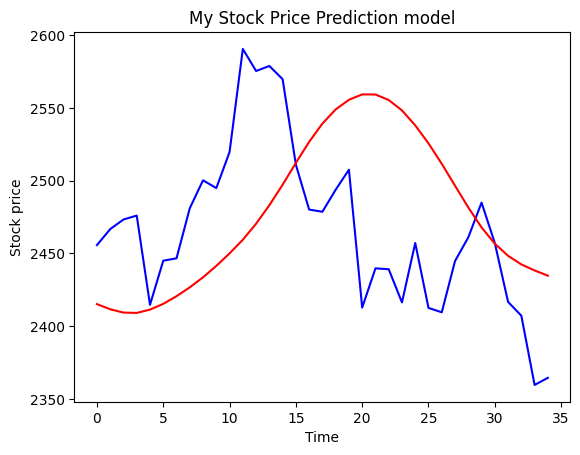

In [18]:
plt.plot(real_stock_price, color='blue', label='Stock price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock price')
plt.title('My Stock Price Prediction model')
plt.ylabel('Stock price')
plt.xlabel('Time')
plt.show()